In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fitsio

import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table


# Set some plotting environment variables
sns.set(style='white', context='paper', palette='Set1')
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.grid.which"] = 'both'
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.minor.size'] = 2

In [35]:
fuji = Table(fitsio.read('fuji-matches.fits')) # table of all matches

# Let's explore the matches

In [36]:
# histogram various values

def fujiHist(key, table=fuji, **kwargs):
    '''
    key [str] : key that exists in the astropy Table
    table [astropy Table] : to plot from
    '''
    
    fig, ax = plt.subplots(1,1)
    
    ax.hist(table[key], color='cornflowerblue', **kwargs)
    ax.set_ylabel('N')
    ax.set_xlabel(key.lower().strip('_'))

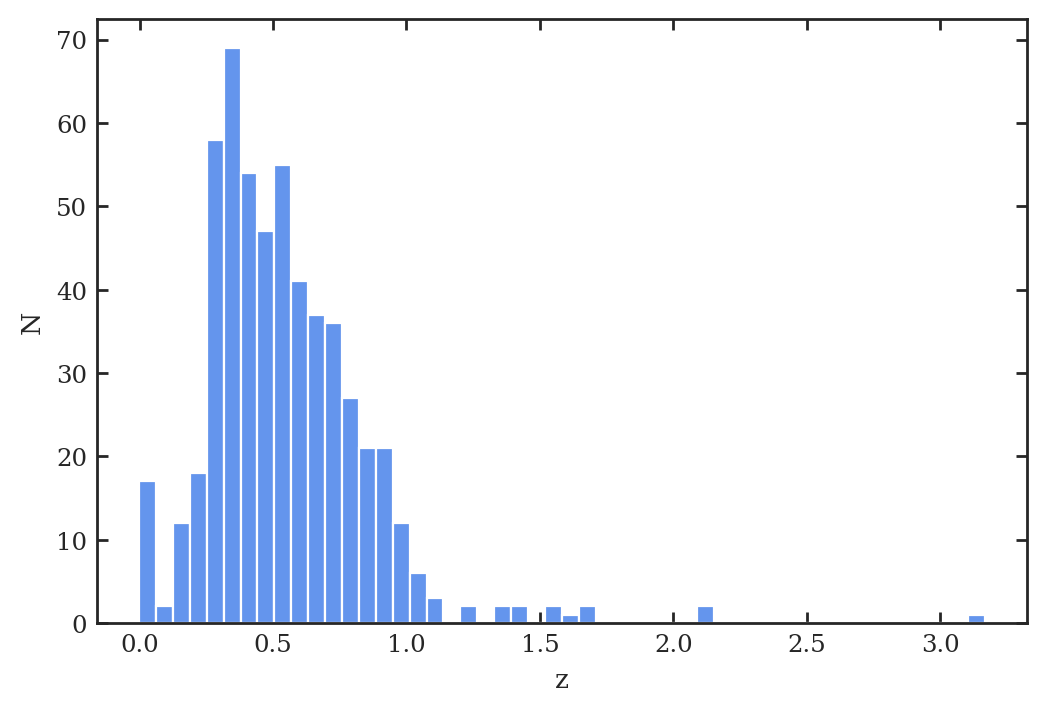

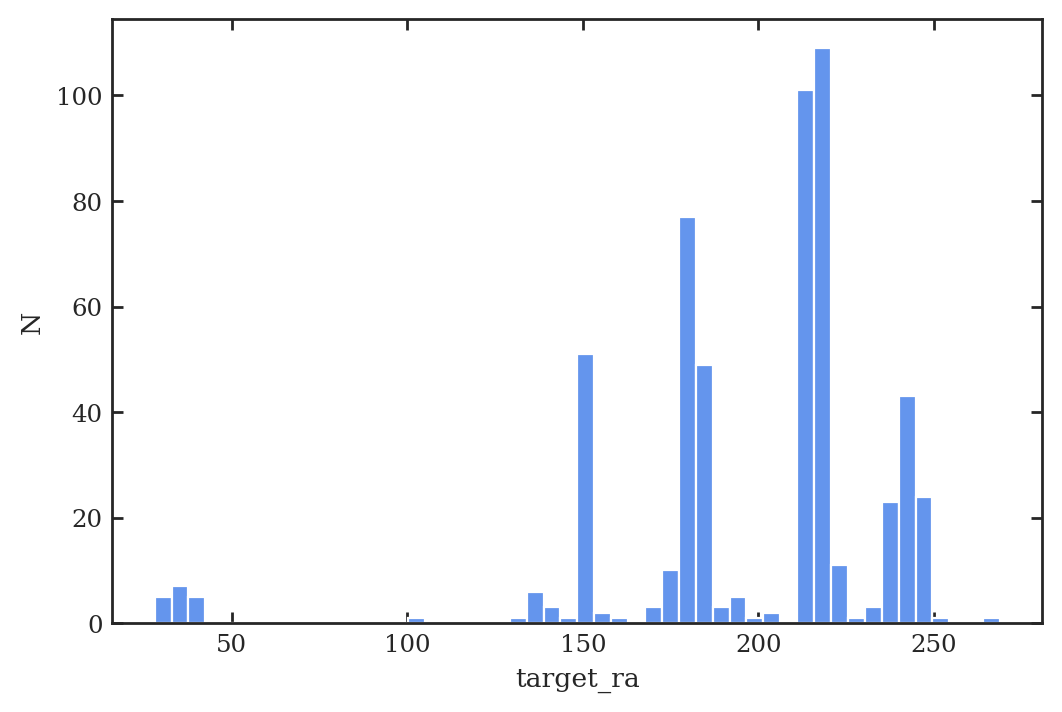

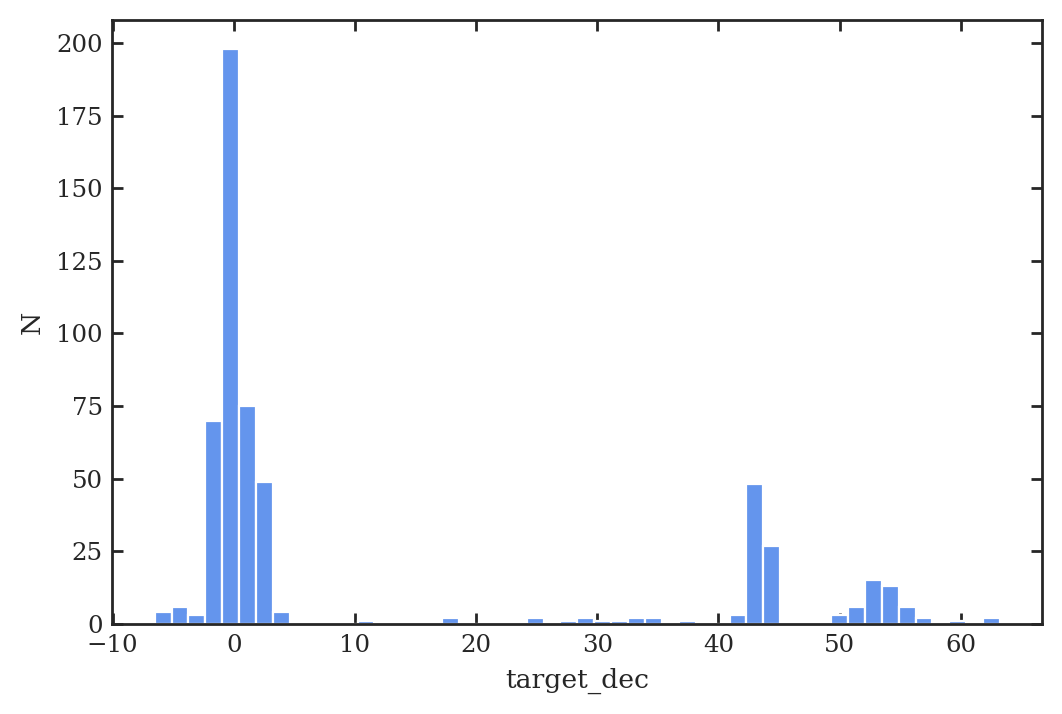

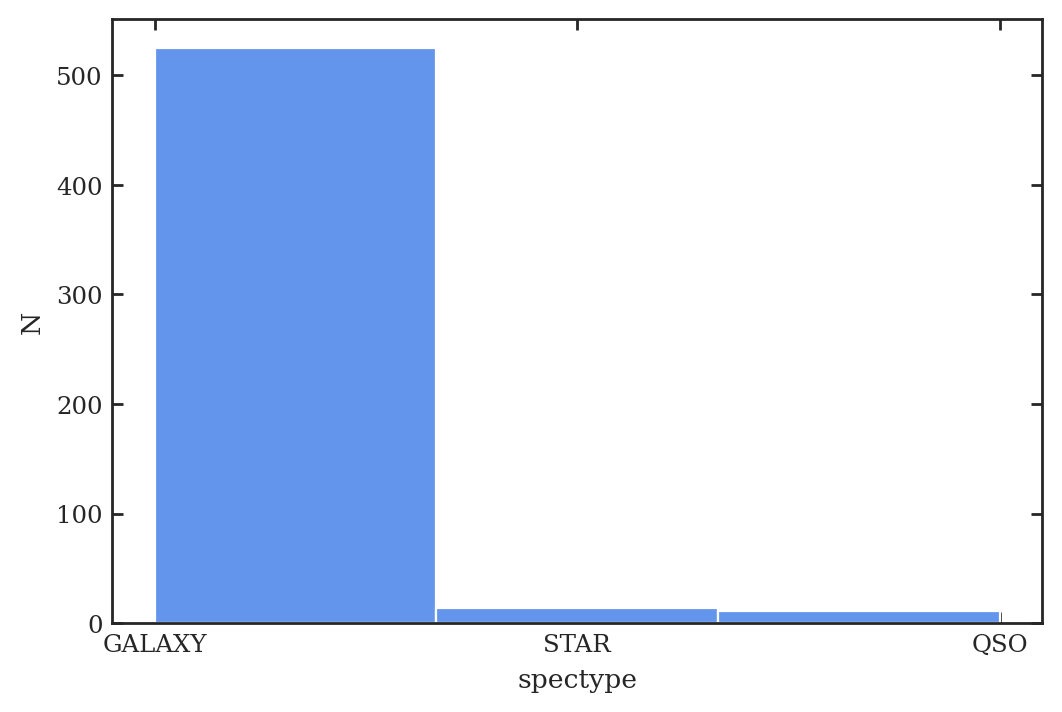

In [37]:
fujiHist('Z', bins=50)
fujiHist('TARGET_RA', bins=50)
fujiHist('TARGET_DEC', bins=50)
fujiHist('SPECTYPE', bins=3)

# Plot Skymap

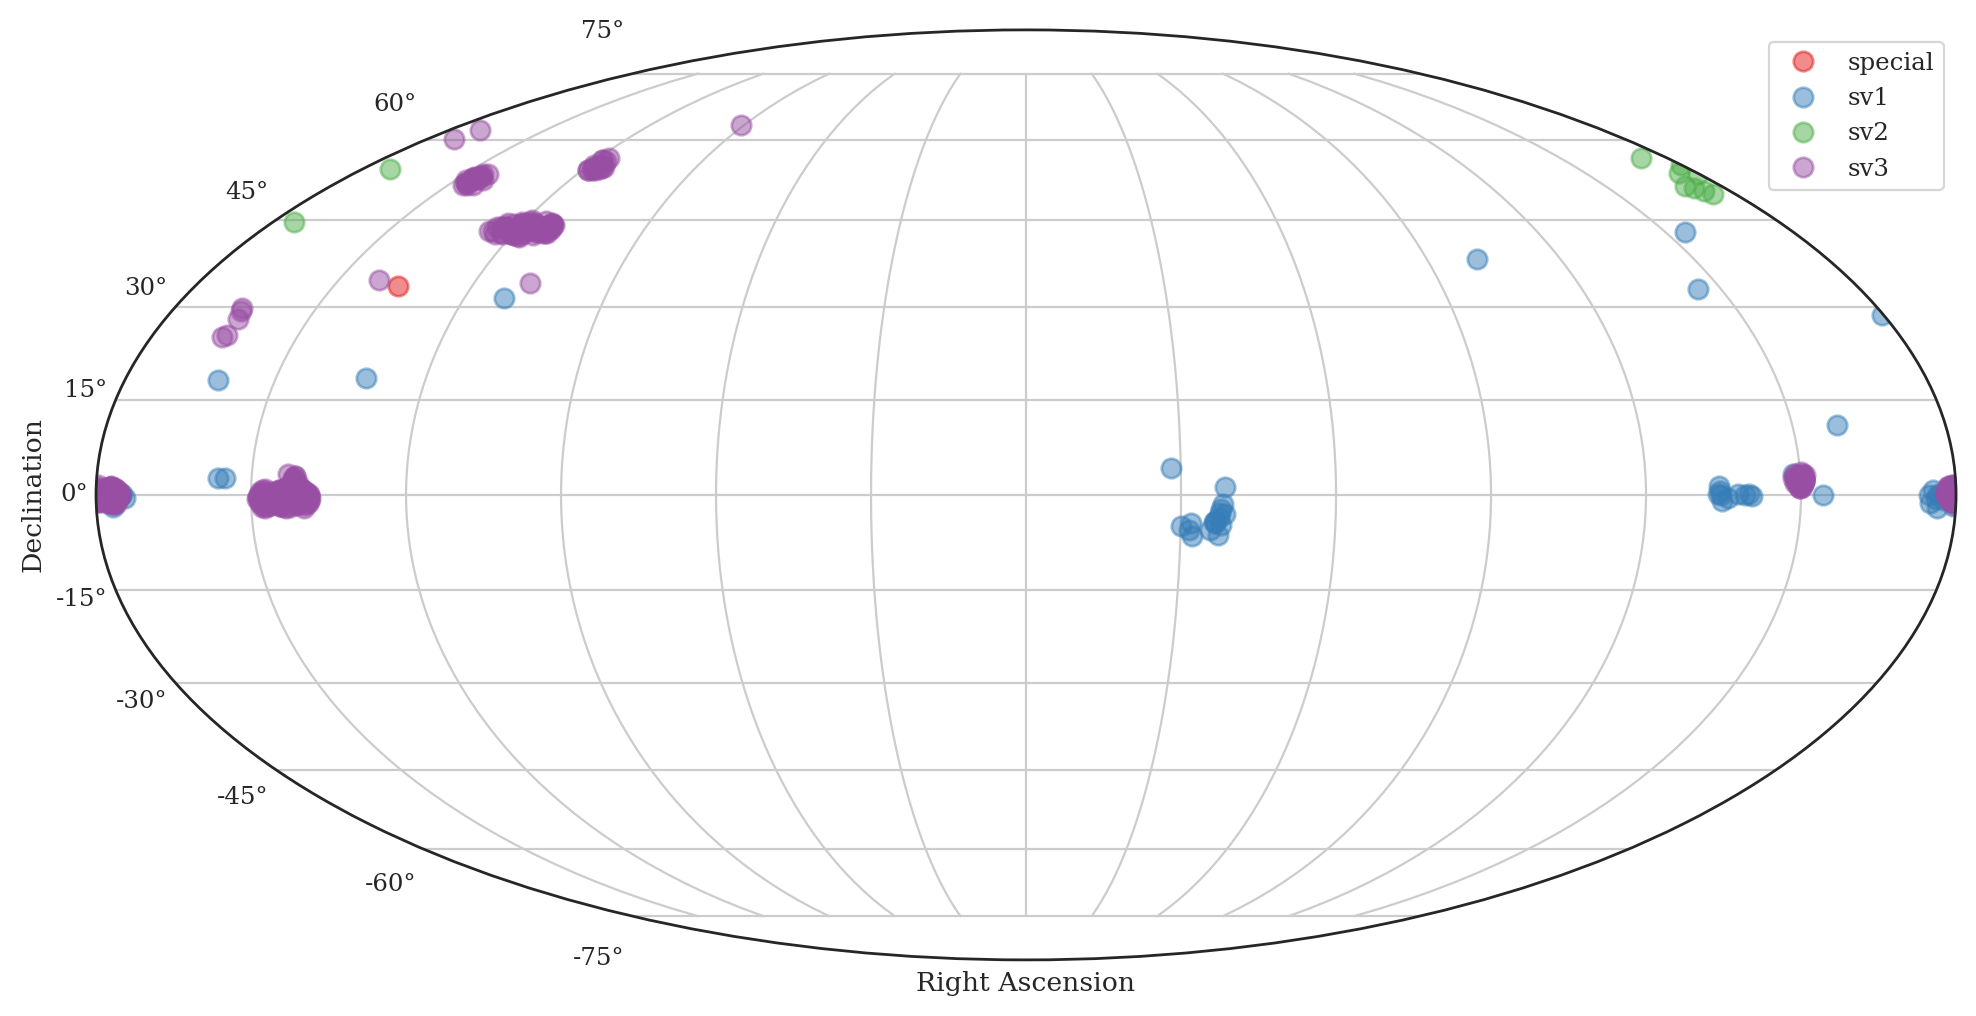

In [66]:
a = 0.5
ms = 7

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="mollweide")

for survey in np.unique(fuji['SURVEY']):
    
    ff = fuji[fuji['SURVEY'] == survey]
    
    targRA = coord.Angle(ff['TARGET_RA']*u.deg)
    targDec = coord.Angle(ff['TARGET_DEC']*u.deg)

    targRA = targRA.wrap_at(180*u.deg)

    ax.plot(targRA.radian, targDec.radian, 'o', label=survey, zorder=2, markersize=ms, alpha=a)

ax.grid()
ax.set_xticklabels([])
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
_=ax.legend(loc='upper right')
fig.savefig('mollweide-projection-matches.png', bbox_inches='tight', transparent=False)

special
sv1
sv2
sv3
